#Financial Sentiment


##Install and Import Dependencies

In [ ]:
!pip install textsum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=4b3dba4c708d6b22c803a305af10105b75e4fbe95161b5ef787c9bc85939e325
  Stored in directory: /root/.cache/pip

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

##Instantiate Model

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

##Encode and Calculate Sentiment

In [ ]:
from textsum.summarize import Summarizer

model_name = "pszemraj/led-large-book-summary"
summarizer = Summarizer(
    model_name_or_path = model_name,
    token_batch_length=4096,
)

In [ ]:
long_string = """Food was terrible"""

out_str = summarizer.summarize_string(long_string)
print(out_str)

Generating Summaries:   0%|          | 0/1 [00:00<?, ?it/s]

The narrator says that the food was terrible


In [ ]:
tokens = tokenizer.encode(out_str,return_tensors='pt')

In [ ]:
result = model(tokens)

In [ ]:
result.logits

tensor([[ 3.2962,  0.6633, -3.8086]], grad_fn=<AddmmBackward0>)

In [ ]:
int(torch.argmax(result.logits))+1 #FOLLOWING DIDNT WORK NICE TRY THOUGH

1

##Scrape Data

#Financial Sentiment(Using Financial model)

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_fin = AutoTokenizer.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
model_fin = AutoModelForSequenceClassification.from_pretrained("mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")
print(model_fin.config)

RobertaConfig {
  "_name_or_path": "mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative",
    "1": "neutral",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 0,
    "neutral": 1,
    "positive": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.35.0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



##Summary generation (same as above tbh)

##Financial Sentiment

In [ ]:
tokens = tokenizer_fin.encode(out_str,return_tensors='pt')

In [ ]:
result = model_fin(tokens)

In [ ]:
print(dir(result))
print(result.logits)
print(softmaxxed)

['__annotations__', '__class__', '__class_getitem__', '__contains__', '__dataclass_fields__', '__dataclass_params__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__ne__', '__new__', '__or__', '__post_init__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'attentions', 'clear', 'copy', 'fromkeys', 'get', 'hidden_states', 'items', 'keys', 'logits', 'loss', 'move_to_end', 'pop', 'popitem', 'setdefault', 'to_tuple', 'update', 'values']
tensor([[ 3.2962,  0.6633, -3.8086]], grad_fn=<AddmmBackward0>)
tensor([[2.8970e-04, 8.8624e-05, 9.9962e-01]], grad_fn=<SoftmaxBackward0>)


In [ ]:
int(torch.argmax(result.logits)) #    "negative": 0, "neutral": 1, "positive": 2

0

##Softmaxing

tensor([[ 3.2962,  0.6633, -3.8086]], grad_fn=<AddmmBackward0>)
tensor([[9.3223e-01, 6.7000e-02, 7.6551e-04]], grad_fn=<SoftmaxBackward0>)


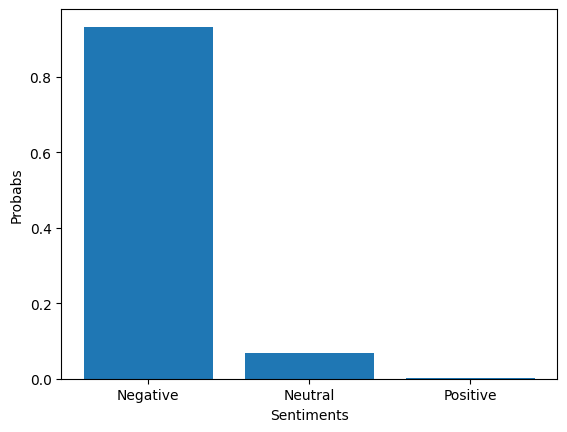

In [ ]:
import torch
import matplotlib.pyplot as plt
temprature = 1.0
logits = result.logits
softmaxxed = torch.nn.functional.softmax(result.logits / temprature ,dim=1)

print(logits)
print(softmaxxed)
classes = ['Negative','Neutral','Positive']

plt.bar(classes, softmaxxed.squeeze().detach().numpy())
plt.xlabel("Sentiments")
plt.ylabel("Probabs")
plt.show()